# Credit Card Fraud Detection - Capstone Project

# Business Understanding

Purchases made through websites or in situ stores represent an imminent danger to credit/debit cardholders throughout the world, given their exposure to cybernetic dangers that may generate unrecognized fraud transactions.
Thus, it is important to generate a trustworthy AI model that detects potential threats based on transaction datasets collected on a daily-basis routine.

This applies particularly to the finance industry, with an emphasis on the fraud monitoring techniques that are implemented on a bigger scale at banks worldwide.

The main focus of this project is to demonstrate how a bank can detect frauds based on your daily financial activities.

# Data Understanding

The collected dataset consists of a CVS type file with transactions made by credit cards in September 2013 by European cardholders.

Data was obtained data through a direct download form the Kaggle website, result of an extensive search of machine learning datasets. The web link to this dataset is: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

We must import the data from the downloaded file 'creditcard.csv'. To do so, we must import the Python Pandas library and use the read_csv() function.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


This dataset consists of numerical input variables only. Most features (V1 to V28) are the result of PCA transformation of the original features due to confidentiality issues; the rest (‘Time’, ‘Amount’ and 'Class') haven’t been modified at all.

Next, it is necessary to know which type of data we are dealing with in case there are some N/A values to be deleted/substituted with Measures of Central Tendency (MCT) or non-numerical categories required to be encoded.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


There are non-null values in this dataset, which means no method to delete or fill N/A values with mean (for numerical variables) or mode (for ctageorical variables) are necessary at all. 29 features consist of float-type data and only the 'Class' category is an integer, given the 1 or 0 values that identify if a transaction is an authentic fraud or not.

By observing the MCT values for all features and label, it will be necessary to standarize all data so we can obtain more reliable results. For most features, it is evident that the unit variation is considerably different: 'Time' exceeds the thousand units; V1 to V28, alongside 'Class' have units below zero and the only feature to posess a magnitude of order 1 is 'Amount'.

Now, it is important to verify the proportion of the unbalanced data so we can stablish a method to deal with this kind of situation. For that, we will use the function value_counts() from the Pandas library. There is an option to display the result in percentage form.

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
data['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

There is an overwhelming difference between classes. For putting it into perspective, the creation of a bar plot is needed as we are dealing with categorical values.

In [8]:
# non-fraud transactions
non_fraud = data[data['Class'] == 0]

In [9]:
non_fraud.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
non_fraud.shape

(284315, 31)

In [11]:
# fraudulent transactions
fraud = data[data['Class'] == 1]

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
fraud.shape

(492, 31)

In [14]:
# importing Python plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Amount of data')

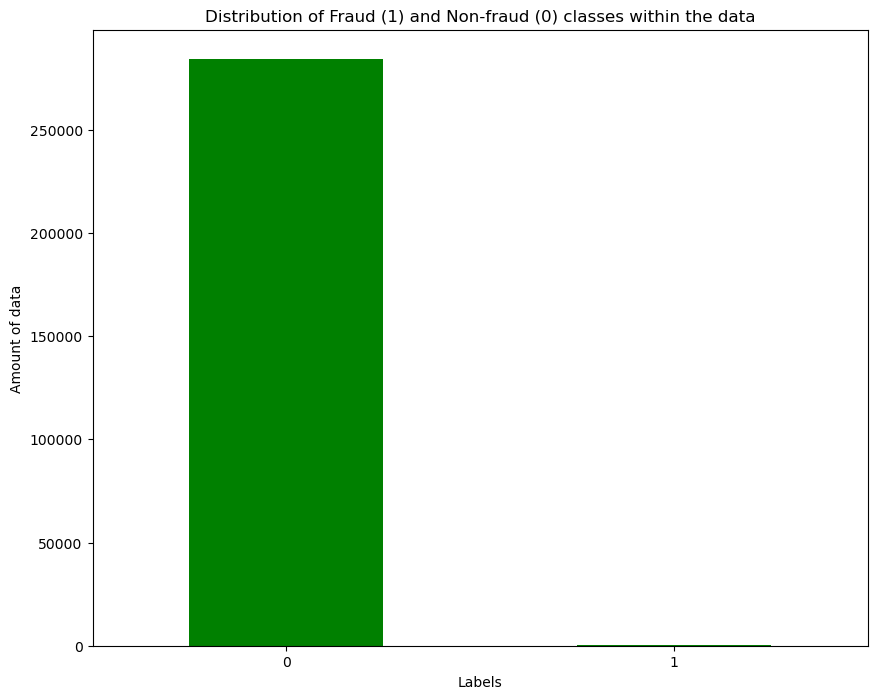

In [18]:
# Fraud and no-fraud operations proportion
fig = plt.figure(figsize = (10, 8))

num_classes = data['Class'].value_counts()
num_classes.plot(kind='bar', rot=0, color='g')
plt.title ("Distribution of Fraud (1) and Non-fraud (0) classes within the data")
plt.xlabel ("Labels")
plt.ylabel ("Amount of data")

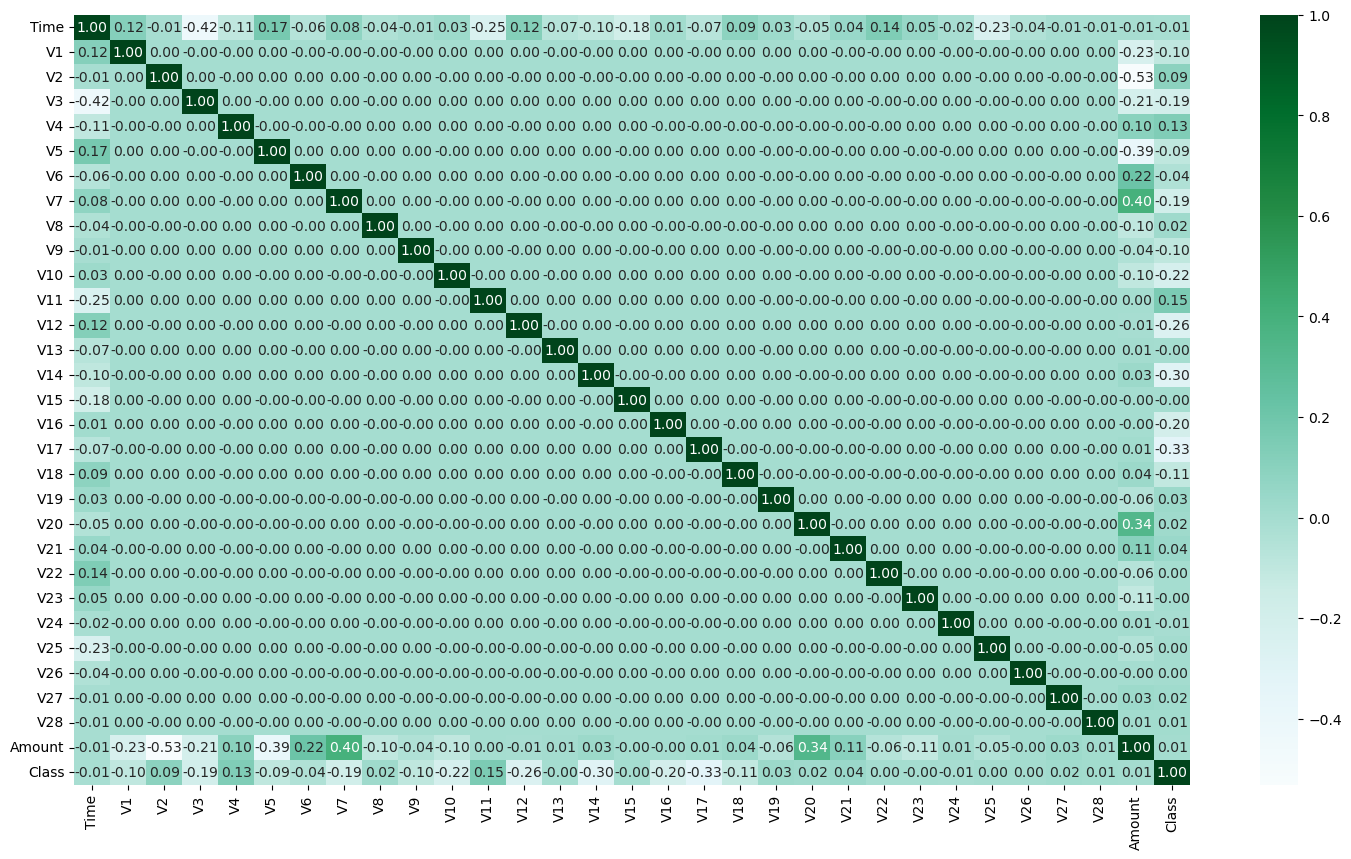

In [19]:
# Correlation of all elements (features and label)
fig = plt.figure(figsize= (18, 10))
sns.heatmap(data.corr(), cmap='BuGn', annot = True, fmt = ".2f")
plt.show()

By observing the last two plots, there are some initial analysis conclusions that are worth to mention:

1. There is a confirmed unbalanced phenomenon present in our data, and the affected category is non other that "Fraud"
2. By observing the correlation matrix, it becomes evident than most of the features (V1 to V28) have basically a null correlation between them. However, there is a modest linear correlation between V1 to V28 variables and Time, Ammount and Class, though most of the correlation values are positive (not exceeding the 0.40 treshold) and the rest negative (not exceeding the -0.60 treshold).

# Data Preparation

Once we have analyzed our data, it is necessary to split it into training, validation and test data sets. These later will be standarized and later resampled in order to use them to train, fit and compare our ML models.

Defining X and y: Target variable is the column called ‘Class’, where 1 represents fraud and 0 the opposite. We will predict if a transaction is fraud or not, so the output is a categorical variable.

In [20]:
y = data['Class']
X = data.drop(['Class'], axis=1)

In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [22]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Split data in train and remnant sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

As all features and the label are numerical variables, there is no need to use One Hot Encoding (OHE). However, the authors of the datset warn that it is highly unbalanced: there are 492 frauds about of 284,315 transactions (only 0.172% of the total ‘Class’ labels).

Before dealing with ubalanced data, we need to standarize to avoid data leakage using scikit-learn's StandardScaler(). Remember, before OHE or resampling, it is imperative to scale our data.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler= StandardScaler()

In [27]:
# X_train is the only set which will be applied the fit_transform() function
# The rest (X_test, X_valid) just require the transform() function
# Explanation of this: if we appplied fit_transform() to X_test and X_valid, the scaler model would learn from these sets too and that would be data leakage
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

After normalizing our data and doing a quick search, one possible solution could be oversampling/undersampling the minority/majority class (respectively) or applying SMOTE (Synthetic Minority Oversampling Technique using k nearest neighbour). This means resampling the entire dataset, in order to increase the imbalanced class or reduce the overbalanced class.

Let's see how the method works over a Pandas dataframe:

#### 1. Undersampling method: example using original data

This means we will reduce the majority class' row quantity.

Text(0, 0.5, 'Amount of data')

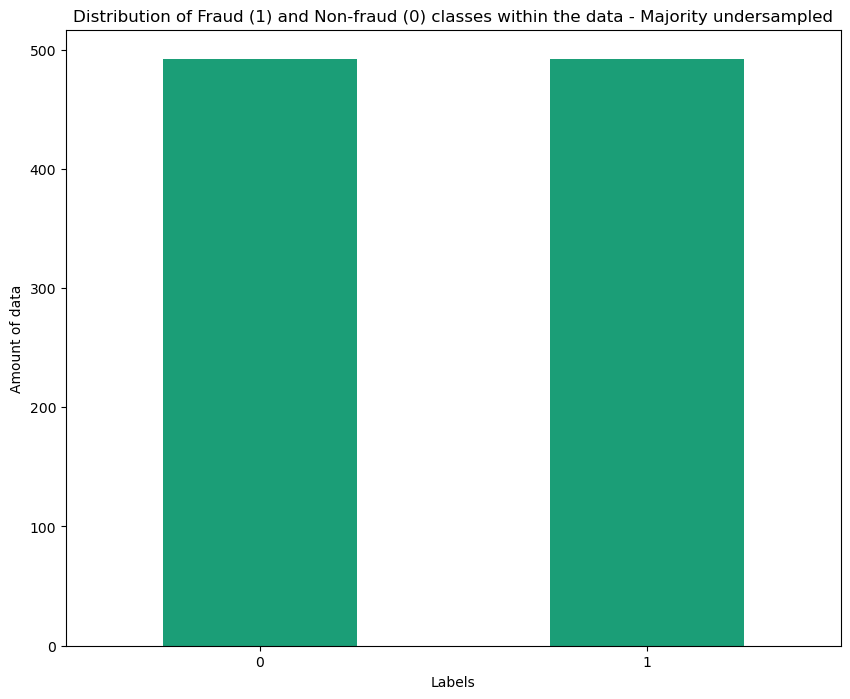

In [30]:
from sklearn.utils import resample

# 2 Dataframes, representing majority and minority classes
data_majority = data[(data['Class']==0)] 
data_minority = data[(data['Class']==1)]

# Undersampling majority class
# n_samples in majority class = 492
data_majority_undersampled = resample(data_majority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 492, # to match majority class
                                 random_state=42)  # reproducible results

# Combine minority class with undersampled majority class
data_undersampled = pd.concat([data_majority_undersampled, data_minority])

# Print results
data_undersampled['Class'].value_counts()

# Show results as a bar plot
fig = plt.figure(figsize = (10, 8))
num_classes = data_undersampled['Class'].value_counts()
num_classes.plot(kind='bar', rot=0, cmap='Dark2')
plt.title ("Distribution of Fraud (1) and Non-fraud (0) classes within the data - Majority undersampled")
plt.xlabel ("Labels")
plt.ylabel ("Amount of data")

#### 2. Oversampling method: example using original data

This means we will increase the minority class' row quantity.

Text(0, 0.5, 'Amount of data')

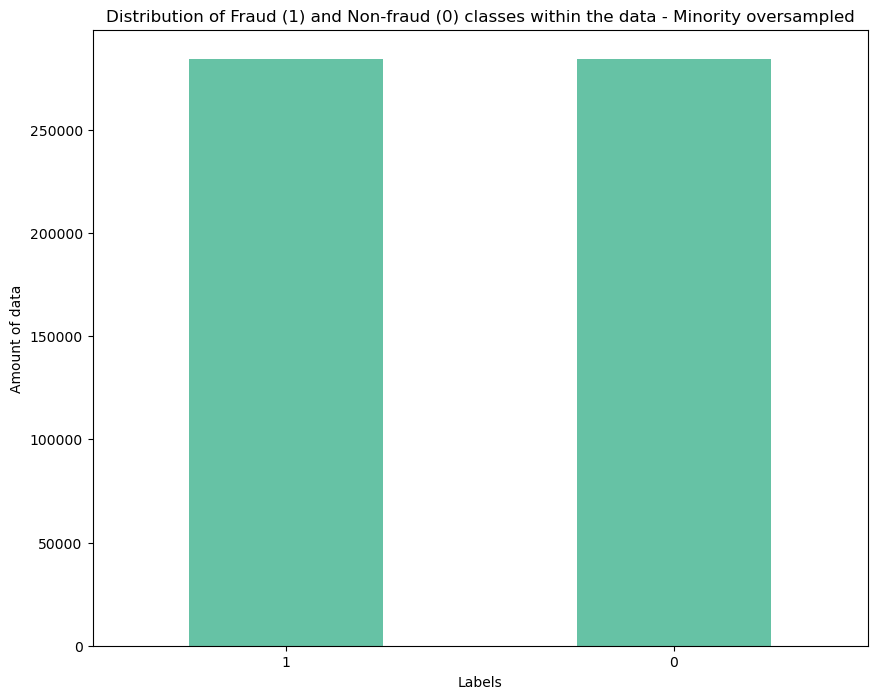

In [31]:
# 2 Dataframes, representing majority and minority classes
data_majority = data[(data['Class']==0)] 
data_minority = data[(data['Class']==1)]

# Oversampling majority class
# n_samples in majority class = 284315
data_minority_oversampled = resample(data_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 284315, # to match majority class
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
data_oversampled = pd.concat([data_minority_oversampled, data_majority])

# Print results
data_oversampled['Class'].value_counts()

# Show results as a bar plot
fig = plt.figure(figsize = (10, 8))
num_classes = data_oversampled['Class'].value_counts()
num_classes.plot(kind='bar', rot=0, cmap='Set2')
plt.title ("Distribution of Fraud (1) and Non-fraud (0) classes within the data - Minority oversampled")
plt.xlabel ("Labels")
plt.ylabel ("Amount of data")

#### 3. SMOTE (Synthetic Minority Oversampling Technique) method: example using original data

In SMOTE new instances are synthesized from preexisting data using k-nearest neighbor to select a random nearest neighbor, and a synthetic instance is created randomly in feature space. It is basicaly an oversampling method, meaning there will be an increase the minority class' row quantity.

In [32]:
%pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)

Text(0, 0.5, 'Amount of data')

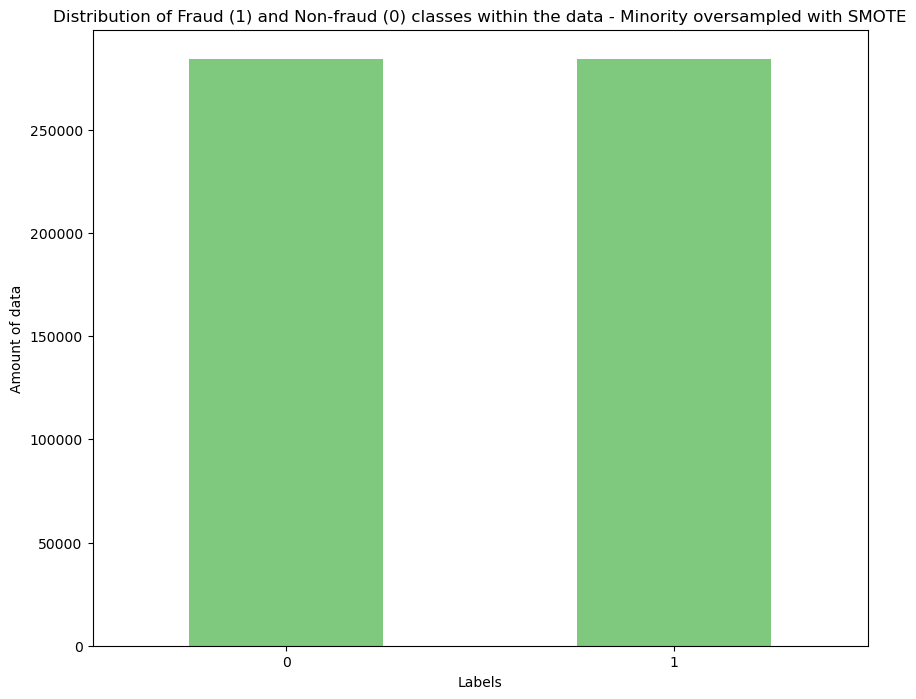

In [36]:
oversampled_X, oversampled_Y = sm.fit_resample(data.drop('Class', axis=1), data['Class'])
data_oversampled_smote = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)
data_oversampled['Class'].value_counts()
fig = plt.figure(figsize = (10, 8))
num_classes = data_oversampled_smote['Class'].value_counts()
num_classes.plot(kind='bar', rot=0, cmap='Accent')
plt.title ("Distribution of Fraud (1) and Non-fraud (0) classes within the data - Minority oversampled with SMOTE")
plt.xlabel ("Labels")
plt.ylabel ("Amount of data")

According to the article *Research on expansion and classification of imbalanced data based on SMOTE algorithm* (Wang, et.al, 2021), the authors affirm "SMOTE algorithm can improve the classification effect of imbalanced data by randomly generating new minority sample points to increase the imbalance rate to a certain extent.". This is the reason why it will be applied to both our training and test sets.

The article can be consulted on the following URL link: https://www.nature.com/articles/s41598-021-03430-5

In [37]:
# Fit the model to generate the new resampled data.
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
X_test, y_test = SMOTE().fit_resample(X_test, y_test)

# Modeling

For the sake of this capstone, it is important to compare at least two models in order to decide which one is better based on their advantages and disadvantages (runtime, metrics).

#### Logistic Regression

Used to predict categorical target variables through linear combination of the selected features.

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression(random_state=42)

In [40]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [41]:
predict_lr = lr.predict(X_test)

#### Random Forest Classifier

Known to solve regression or classification problems (there is a need to differentiate between fraud and no fraud).

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(random_state=42)

In [44]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
predict_rfc = rfc.predict(X_test)

#### Support Vector Classification

Effective in high dimensional spaces (dataset consists of 30 features).

However, even after an hour the fit process for the SVC method was far to be completed (not only because of the number of features, but also the number of rows). Therefore it is not a viable option for this capstone project

from sklearn.svm import SVC

svc = SVC(random_state=42)

svc.fit(X_train, y_train)

predict_svc = svc.predict(X_test)

# Evaluation

The authors recommend measuring accuracy through the Area Under the Precision-Recall Curve, given the unbalanced nature of the dataset. The rest of the traditional metrics will be incorporated (precision, F1-score, recall), as well as a confusion matrix to see how well the models classified data

In [46]:
# Usual metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# ROC curve and score
from sklearn.metrics import roc_curve, roc_auc_score
# Confussion matrix
from sklearn.metrics import confusion_matrix

#### Metrics for Logistic Regression

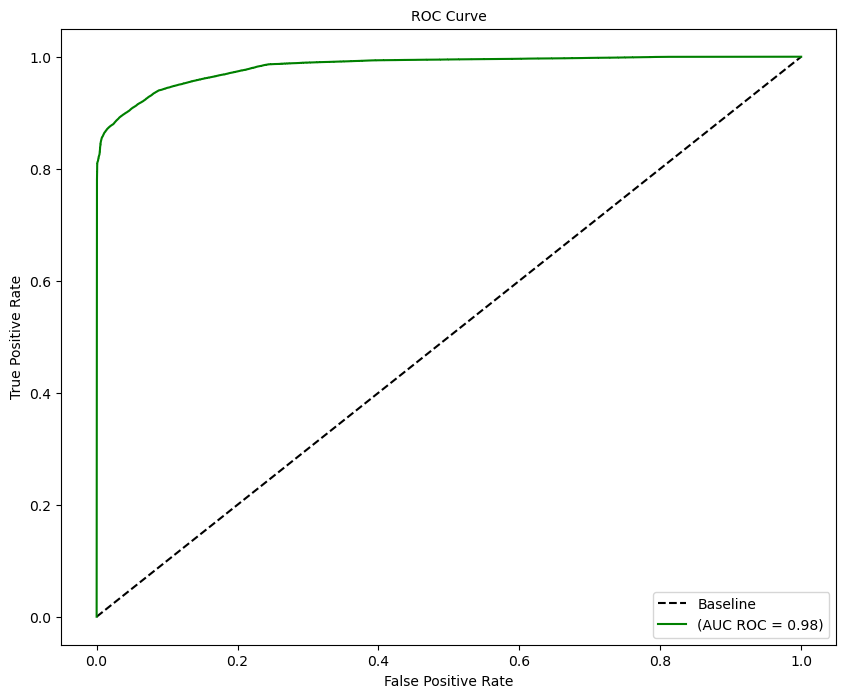

In [57]:
# ROC curve
ax, fig = plt.subplots(figsize=(10,8)) 

plt.plot([0,1], [0,1], linestyle='--', label='Baseline', color = 'black') 

y_probs = lr.predict_proba(X_test) 
y_probs = y_probs[:, 1] 

fpr, tpr, _ = roc_curve(y_test, y_probs) 
auc_lr = round(roc_auc_score(y_test, y_probs), 4) 

plt.plot(fpr, tpr, label = (f'(AUC ROC = {auc_lr:.2f})'), color='green') 
plt.legend(loc='best') 

# labels and axis config
plt.ylabel('True Positive Rate', size = 10) 
plt.xlabel('False Positive Rate', size = 10) 
plt.title('ROC Curve', size=10) 
plt.legend() 

plt.show()

In [66]:
# Metrics
precision_lr = precision_score(y_test, predict_lr)
recall_lr = recall_score(y_test, predict_lr)
f1_score_lr = f1_score(y_test, predict_lr)

print(f"Metrics for Logistic Regression:")
print(f"Area under the curve: {auc_lr*100:.4f}%")
print(f"Precision: {precision_lr*100:.4f}%")
print(f"Recall: {recall_lr*100:.4f}%")
print(f"F1-score: {f1_score_lr*100:.4f}%")

Metrics for Logistic Regression:
Area under the curve: 98.2300%
Precision: 97.5930%
Recall: 87.8018%
F1-score: 92.4389%


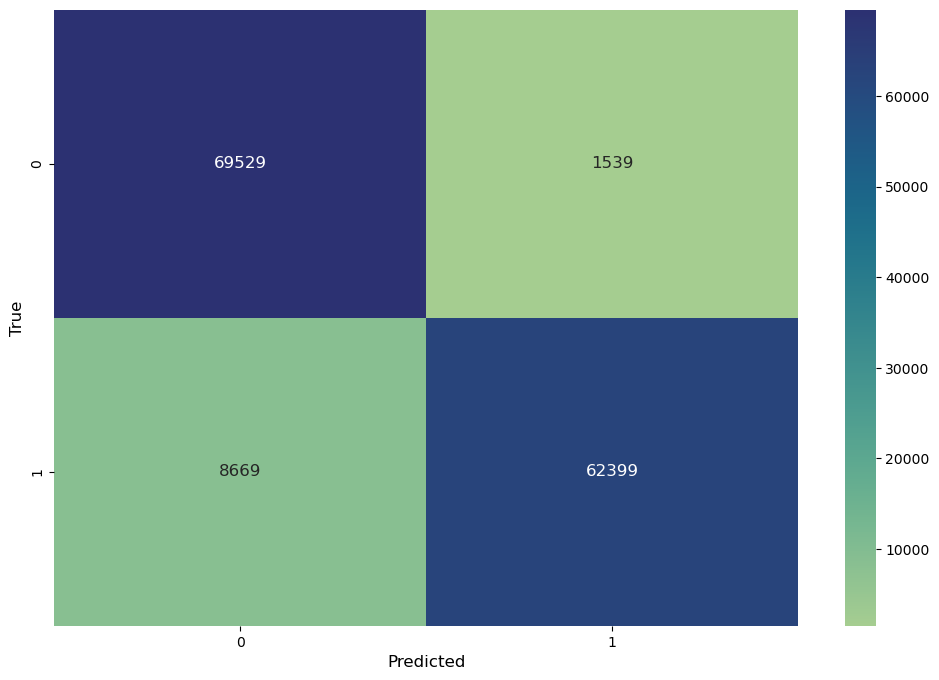

In [54]:
# Confussion matrix
cm_lr = confusion_matrix(y_test, predict_lr)
plt.figure(figsize=(12, 8))
sns.heatmap(cm_lr, annot=True, cmap='crest', fmt='g', annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.show()

Interpreting the metrics for Logistic Regression:

- Area under the curve:  Means we correctly predicted "Fraud" transactions by 98.2300% from both "Fraud" and "Non-fraud" classes.
- Precision: Of all the "Fraud" predicted transactions, 97.5930% are truly "Fraud".
- Recall: Of all the truly "Fraud" transactions, 87.8018% are correctly predicted.
- F1-score: Overall, the model has an F1-score of 92.4389%

Interpreting the confusion matrix for Logistic Regression:

- Correctly classified transactions as fraud: 62,399
- Correctly classified transactions as non-fraud: 69,529
- Incorrectly classified transactions as fraud: 1,539
- Incorrectly classified transactions as non-fraud: 8,669

#### Metrics for Random Forest Classifier

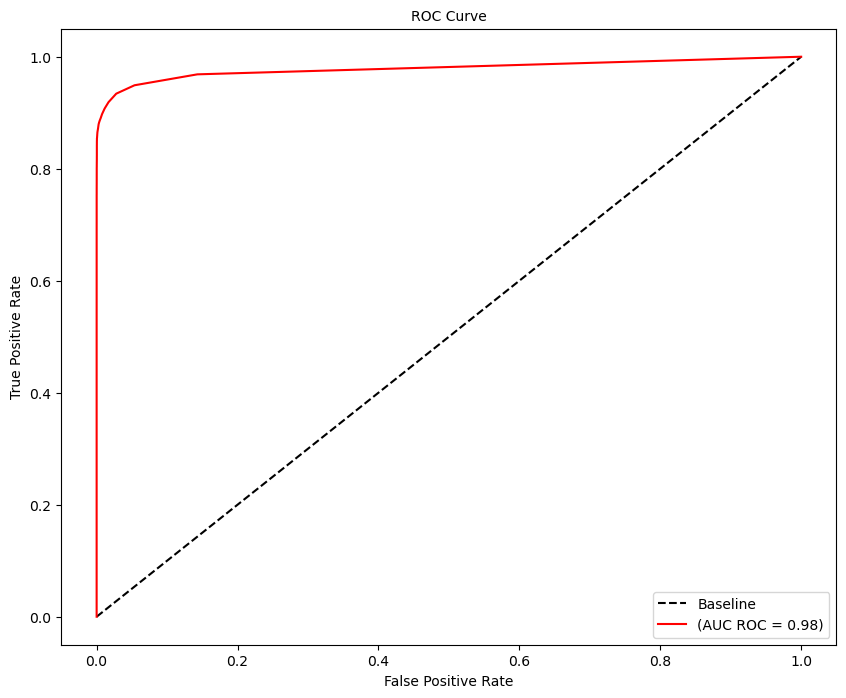

In [62]:
# ROC curve
ax, fig = plt.subplots(figsize=(10,8)) 

plt.plot([0,1], [0,1], linestyle='--', label='Baseline', color = 'black') 

y_probs = rfc.predict_proba(X_test) 
y_probs = y_probs[:, 1] 

fpr, tpr, _ = roc_curve(y_test, y_probs) 
auc_rfc = round(roc_auc_score(y_test, y_probs), 4) 

plt.plot(fpr, tpr, label = (f'(AUC ROC = {auc_rfc:.2f})'), color='red') 
plt.legend(loc='best') 

# labels and axis config
plt.ylabel('True Positive Rate', size = 10) 
plt.xlabel('False Positive Rate', size = 10) 
plt.title('ROC Curve', size=10) 
plt.legend() 

plt.show()

In [67]:
# Metrics
recall_rfc = recall_score(y_test, predict_rfc)
precision_rfc = precision_score(y_test, predict_rfc)
f1_score_rfc = f1_score(y_test, predict_rfc)

print(f"Metrics for Random Forest Classifier:")
print(f"Area under the curve: {auc_rfc*100:.4f}%")
print(f"Precision: {precision_rfc*100:.4f}%")
print(f"Recall: {recall_rfc*100:.4f}%")
print(f"F1-score: {f1_score_rfc*100:.4f}%")

Metrics for Random Forest Classifier:
Area under the curve: 97.8700%
Precision: 99.9723%
Recall: 81.1434%
F1-score: 89.5791%


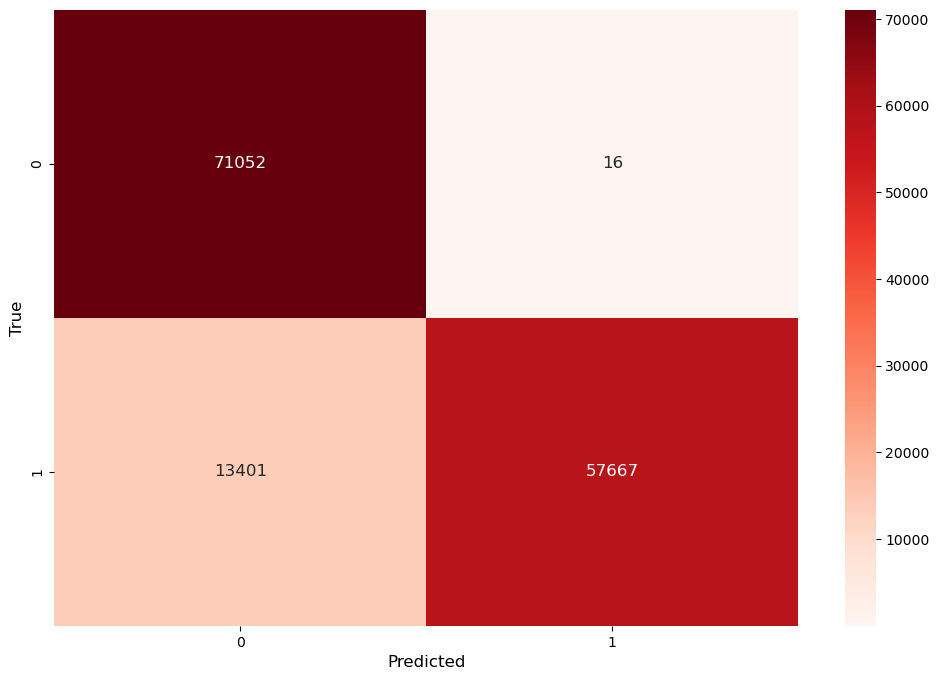

In [55]:
# Confussion Mmatrix
cm_rfc = confusion_matrix(y_test, predict_rfc)
plt.figure(figsize=(12, 8))
sns.heatmap(cm_rfc, annot=True, cmap='Reds', fmt='g', annot_kws={"size": 12})
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.show()

Interpeting the metrics for Random Forest Classifier:

- Area under the curve:  Means we correctly predicted "Fraud" transactions by 97.8700% from both "Fraud" and "Non-fraud" classes.
- Precision: Of all the "Fraud" predicted transactions, 99.9723% are truly "Fraud".
- Recall: Of all the truly "Fraud" transactions, 81.1434% are correctly predicted.
- F1-score: Overall, the model has an F1-score of 89.5791%

Interpreting the confusion matrix for Random Forest Classifier:

- Correctly classified transactions as fraud: 57,667
- Correctly classified transactions as non-fraud: 71,052
- Incorrectly classified transactions as fraud: 16
- Incorrectly classified transactions as non-fraud: 13,401

#### Metrics for Support Vector Classification

recall_svc = recall_score(y_test, predict_svc)

precision_svc = precision_score(y_test, predict_svc)

f1_score_svc = f1_score(y_test, predict_svc)

print(f"Metrics for Support Vector Classification:")

print(f"Recall: {recall_svc}")

print(f"Recall: {precision_svc}")

print(f"Recall: {f1_score_svc}")

cm_svc = confusion_matrix(y_test, predict_svc)

plt.figure(figsize=(12, 8))

sns.heatmap(cm_svc, annot=True, cmap='Greens', fmt='g', annot_kws={"size": 12})

plt.xlabel('Predicted', fontsize=12)

plt.ylabel('Actual', fontsize=12)

plt.show()

# Conclusions

At first sight, anyone would think the "creditcard.csv" dataset isn't as complex as other models with features such as nominal or ordinal, presence of NA or duplicated values, list of images or text corpus. That is why analyzing our data comes first and makes us understand that other phenomena can be present in our sets, such as undersampled classes. This has multiple solutions, and maybe the most used is the SMOTE algorithm (although it some statistical-wise disadvantages to consider).

A commonly present error during data transformation is that most begginers (including myself) tend to treat unbalanced data before standarizing it. Data leakage topics suggest the opposite, simply because this will avoid model bias and ensure a correct training for our model. Once we ensured scaled and balanced data, it is crucial to decide from which models we can start our class prediction. There are plenty of options and some are perfect for categorizing data with a large number of features such as Logistic Regression or Random Forests.

But when machine learning knowledge matters the most is to understand how well our created model(s) performed when tested. In this case, both models had quite significant results in correctly and incorrectly classifying "Fraud"/"Non-fraud" classes. Without the metrics, it would be obvious to choose the Random Forest Classifier [RFC] model as it has a great proporion of authenic "Fraud" and "Non-fraud" if compared against the other model, Logistic Regression [LR].

Surprisingly, the F-1 score comes to set an entire different perspective: LR had 92.4389%, almost three hundreths higher than the 89.5791% belonging to RFC. As this gives a general perspective of model performance (with 100% the highest value and 0% the lowest), it means that LR performs better than RFC with testing values. How else can we confirm such declaration? By comparing the rest of metrics (precision, recall and the AUC-ROC score, most of them higher for the LR results).

All of this has one crucial teaching: a great model not only should correctly predict "Fraud" or "Non-graud", but also have a reasonable proportion of not-correctly classified data in order to implement further tuning and most sophisticated techniques at a larger scale.